In [2]:
import numpy as np
import matplotlib.pyplot as plt

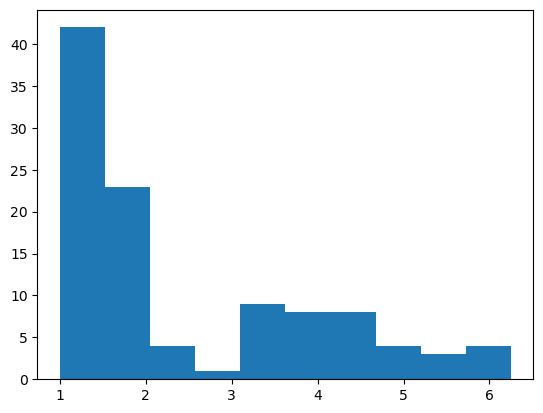

In [3]:
#Wanda Landau Algorithm PART 2

def Energy(x): #define Harmonic Oscillator Energy
    return x**2

def Hist_flat(Hist):
    H_arr = np.array(Hist)
    Havg = np.mean(H_arr)
    Hlim = 0.8*Havg
    H_mask = H_arr < Hlim
    if False in H_mask:
        return False
    else:
        return True

#g = 1 for all energy levels / spectrum

#Create array of energy spectra and have x walk around these values
x_bounds = (1,11)
L = x_bounds[1] - x_bounds[0]

step = 0.1
x_spectrum = np.arange(x_bounds[0],x_bounds[1]+step,step)
E_spectrum = Energy(x_spectrum)

g_start = np.ones_like(E_spectrum) 
N_start = np.zeros_like(E_spectrum)
g_N_start = np.stack((g_start,N_start),axis=-1)

#key = index of energy, value is [g,N] where g=DOS and N=number of energies visited at that value
E_g_N_dict = dict(zip(np.arange(0,len(E_spectrum),1),g_N_start)) 

start_index = int(np.random.choice(x_spectrum.shape[0], 1, replace=False)[0])

H_E = []
c=0
index_curr = start_index
Flat = False
f_curr = np.e
while Flat == False:
    
    #Current values
    E_curr = E_spectrum[index_curr]
    E_g_N_dict[index_curr][1] += 1 #adds one to N at that current value
    E_g_N_dict[index_curr][0] = E_g_N_dict[index_curr][1] * E_curr / L
    g_curr = E_g_N_dict[index_curr][0]

    #proposal energy, randomly move in x space, which just means randomly move up or down in index
    r_temp = np.random.uniform(-1,1)
    p_or_m = int(r_temp/(abs(r_temp))) #plus or minus one
    index_proposed = index_curr + p_or_m
    #index_proposed = int(np.random.choice(x_spectrum.shape[0], 1, replace=False)[0])
    if index_proposed > len(E_spectrum)-1 or index_proposed < 0: #considering the bounds of the problem
        #keeping the current and updating H with E_curr
        #doing point 2 in the video of what to do on bounds with Wang Landau
        H_E.append(E_curr)
        Flat = Hist_flat(H_E)
        
        #doing 1 now of rejecting the ones outside of the bounds
#         E_g_N_dict[index_curr][1] -= 1
#         E_g_N_dict[index_curr][0] = E_g_N_dict[index_curr][1]*E_curr / L
        continue
        
    E_proposed = E_spectrum[index_proposed]
    E_g_N_dict[index_proposed][1] += 1 #adds one to N at proposed value
    E_g_N_dict[index_proposed][0] =  E_g_N_dict[index_proposed][1] * E_proposed / L
    g_proposed = E_g_N_dict[index_proposed][0]    
    
    #acception criteria
    r = np.random.uniform(0,1)
    P_trans = np.minimum(g_curr/g_proposed,1) 
#     if c<9990 or c>800:
#         print(f'E_curr: {E_curr}, and E_proposal: {E_proposed} and index_proposed: {index_proposed}')
#         print(f'Prob: {g_curr/g_proposed}, r: {r}, Accepted: {r<P_trans}')
    if r<P_trans:
        index_curr = index_proposed
        E_curr = E_proposed #makes appending to histogram look cleaner
        #g_proposed is already in the dictionary
    else:
        #have to take back proposed N count from the dictionary
        E_g_N_dict[index_proposed][1] -= 1
        E_g_N_dict[index_proposed][0] = E_g_N_dict[index_proposed][1]*E_proposed / L
        
    H_E.append(E_curr)
    #update accepted g by multiply by f
    E_g_N_dict[index_curr][0] *= f_curr
    Flat = Hist_flat(H_E)
    c+=1
    if c==100:
        plt.hist(H_E)
        break
        
        


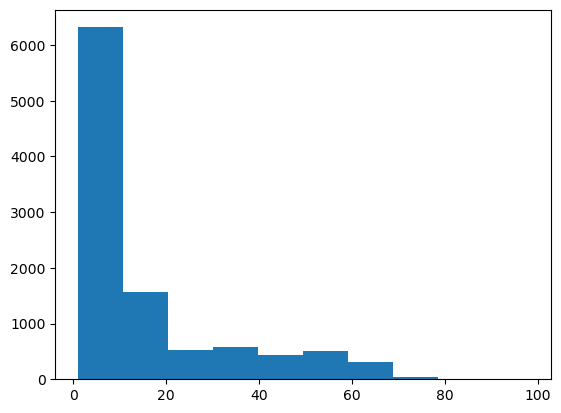

In [4]:
#Wanda Landau Algorithm PART 3 NATURAL LOGARITHMS

#S      = zeros( (N + 1), float)                      # Entropy = log g(E)

def Energy(x): #define Harmonic Oscillator Energy
    return x**2

def Hist_flat(Hist):
    H_arr = np.array(Hist)
    Havg = np.mean(H_arr)
    Hlim = 0.8*Havg
    H_mask = H_arr < Hlim
    if False in H_mask:
        return False
    else:
        print("ITS FLAT!!")
        return True

#g = 1 for all energy levels / spectrum

#Create array of energy spectra and have x walk around these values
x_bounds = (1,11)
L = x_bounds[1] - x_bounds[0]

step = 0.1
x_spectrum = np.arange(x_bounds[0],x_bounds[1]+step,step)
E_spectrum = Energy(x_spectrum)

g_start = np.ones_like(E_spectrum) 
N_start = np.zeros_like(E_spectrum)
g_N_start = np.stack((g_start,N_start),axis=-1)

#key = index of energy, value is [g,N] where g=DOS and N=number of energies visited at that value
E_g_N_dict = dict(zip(np.arange(0,len(E_spectrum),1),g_N_start)) 

start_index = int(np.random.choice(x_spectrum.shape[0], 1, replace=False)[0])

H_E = []
c=0
index_curr = start_index
Flat = False
f_curr = np.e
while Flat == False:
    
    #Current values
    E_curr = E_spectrum[index_curr]
    E_g_N_dict[index_curr][1] += 1 #adds one to N at that current value
    E_g_N_dict[index_curr][0] = E_g_N_dict[index_curr][1] * E_curr / L
    g_curr = E_g_N_dict[index_curr][0]

    #proposal energy, randomly move in x space, which just means randomly move up or down in index
    r_temp = np.random.uniform(-1,1)
    p_or_m = int(r_temp/(abs(r_temp))) #plus or minus one
    index_proposed = index_curr + p_or_m
    #index_proposed = int(np.random.choice(x_spectrum.shape[0], 1, replace=False)[0])
    if index_proposed > len(E_spectrum)-1 or index_proposed < 0: #considering the bounds of the problem
        #keeping the current and updating H with E_curr
        #doing point 2 in the video of what to do on bounds with Wang Landau
        H_E.append(E_curr)
        Flat = Hist_flat(H_E)
        
        #doing 1 now of rejecting the ones outside of the bounds
#         E_g_N_dict[index_curr][1] -= 1
#         E_g_N_dict[index_curr][0] = E_g_N_dict[index_curr][1]*E_curr / L
        continue
        
    E_proposed = E_spectrum[index_proposed]
    E_g_N_dict[index_proposed][1] += 1 #adds one to N at proposed value
    E_g_N_dict[index_proposed][0] =  E_g_N_dict[index_proposed][1] * E_proposed / L
    g_proposed = E_g_N_dict[index_proposed][0]
    
    #acception criteria
    r = np.random.uniform(0,1)
    P_trans = np.minimum(g_curr/g_proposed,1)

    if r<P_trans:
        index_curr = index_proposed
        E_curr = E_proposed #makes appending to histogram look cleaner
        #g_proposed is already in the dictionary
    else:
        #have to take back proposed N count from the dictionary
        E_g_N_dict[index_proposed][1] -= 1
        E_g_N_dict[index_proposed][0] = E_g_N_dict[index_proposed][1]*E_proposed / L
        
    H_E.append(E_curr)
    #update accepted g by multiply by f
    E_g_N_dict[index_curr][0] *= f_curr
    Flat = Hist_flat(H_E)
    c+=1
    if c==10000:
        plt.hist(H_E)
        break
           


0.0


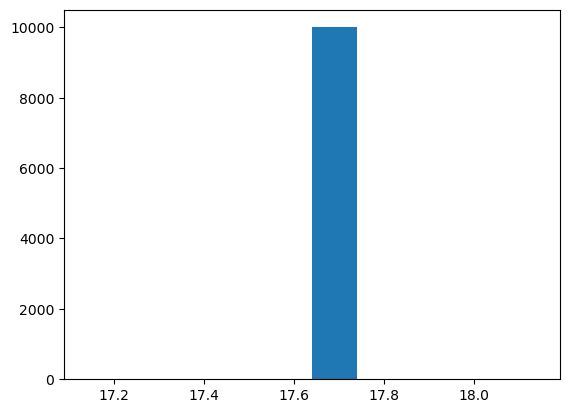

In [21]:
#WANG LANDAU PART 4

def Energy(x): #define Harmonic Oscillator Energy
    return x**2

def Hist_flat(Hist):
    H_arr = np.array(Hist)
    Havg = np.mean(H_arr)
    Hlim = 0.8*Havg
    H_mask = H_arr < Hlim
    if False in H_mask:
        return False
    else:
        print("ITS FLAT!!")
        return True

#g = 1 for all energy levels / spectrum

#Create array of energy spectra and have x walk around these values
x_bounds = (-5,5)
L = x_bounds[1] - x_bounds[0]

step = 0.1
x_spectrum = np.arange(x_bounds[0],x_bounds[1]+step,step)
E_spectrum = Energy(x_spectrum)
#----------------STEP 1 OF ALGORITHM-----------------#
g_start = np.ones_like(E_spectrum)    
N_start = np.zeros_like(E_spectrum)
g_N_start = np.stack((g_start,N_start),axis=-1)

#key = index of energy, value is [g,N] where g=DOS and N=number of energies visited at that value
E_g_N_dict = dict(zip(np.arange(0,len(E_spectrum),1),g_N_start)) 


#---------------STEP 2 OF ALGORITHM-----------------#
start_index = int(np.random.choice(x_spectrum.shape[0], 1, replace=False)[0])  

H_E = []
index_curr = start_index
Flat = False
f_curr = np.log(np.e)


#PUT OTHER LOOP TO DO DECREASING f TO GET FINAL g(E)



#Current values
#---------------STEP 3 OF ALGORITHM-----------------#

E_curr = E_spectrum[index_curr]
g_curr = E_g_N_dict[index_curr][0]

#proposal energy, randomly move in x space, which just means randomly move up or down in index
r_temp = np.random.uniform(-1,1)
p_or_m = int(r_temp/(abs(r_temp))) #plus or minus one
index_proposed = index_curr + p_or_m
if index_proposed > len(E_spectrum)-1 or index_proposed < 0: #considering the bounds of the problem
    #keeping the current and updating H with E_curr
    #doing point 2 in the video of what to do on bounds with Wang Landau
    H_E.append(E_curr)
    Flat = Hist_flat(H_E)
    #doing 1 now of rejecting the ones outside of the bounds
#         E_g_N_dict[index_curr][1] -= 1
#         E_g_N_dict[index_curr][0] = E_g_N_dict[index_curr][1]*E_curr / L

E_proposed = E_spectrum[index_proposed]
g_proposed = E_g_N_dict[index_proposed][0]

c=0
while Flat == False:
    
    #acception criteria
    r = np.random.uniform(0,1)
    P_trans = np.minimum(g_curr/g_proposed, 1)

    if r<P_trans:
        index_curr = index_proposed
        E_curr = E_proposed #makes appending to histogram look cleaner
        #g_proposed is already in the dictionary
    #else:
        
        #have to take back proposed N count from the dictionary
        
    H_E.append(E_curr)
    #update accepted g by multiply by f
    E_g_N_dict[index_curr][0] *= np.log(f_curr)
    Flat = Hist_flat(H_E)
    if c==10000:
        plt.hist(H_E)
        print(E_g_N_dict[index_curr][0])
        break
    c+=1
    


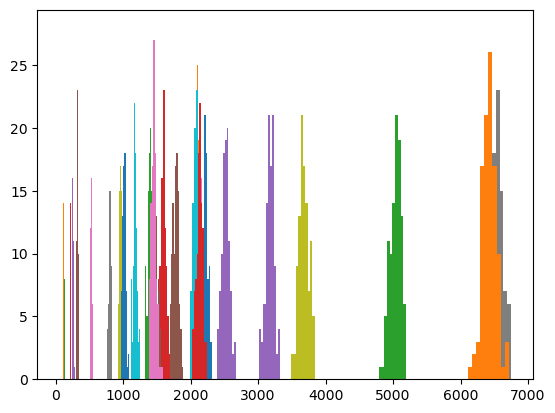

In [56]:
#from scratch now that you have code....
def Energy(x): #define Harmonic Oscillator Energy
    return x**2

#range of the harmonic oscillator
x_bounds = (-5,5)
L = x_bounds[1] - x_bounds[0]

step = 0.1
#x values
x_spectrum = np.arange(x_bounds[0],x_bounds[1]+step,step)

#energy values that WL walks around
E_spectrum = Energy(x_spectrum) #discritized into states

#log density of state ln(g(E))
log_g = np.zeros_like(E_spectrum)

#initialize histogram -> what will be judged if flat
histogram = np.zeros_like(E_spectrum)

#modification factor
f = 1

index_curr = int(np.random.choice(E_spectrum.shape[0], 1, replace=False)[0])  
E_curr = E_spectrum[index_curr]

while f>10**-8:
    
    #chooose random energy
    index_proposed = int(np.random.choice(E_spectrum.shape[0], 1, replace=False)[0])  

    E_proposed = E_spectrum[index_proposed]
    
    r = np.random.uniform(0,1)
    
    g_curr = log_g[index_curr]
    g_proposed = log_g[index_proposed]
    prob_acceptance = np.exp(g_curr - g_proposed)
    if r < prob_acceptance:
        index_curr = index_proposed
        E_curr = E_proposed
    
    histogram[index_curr] += 1 
    log_g[index_curr] += f
    if np.min(histogram) > np.mean(histogram)*0.95:
        #print(np.min(histogram),np.mean(histogram))
        plt.hist(histogram)
        histogram = np.zeros_like(E_spectrum)
        f /= 2    